Dataset shape: (344, 7)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
       species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       152     168   168
Value counts for species:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Value counts for island:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Value counts f

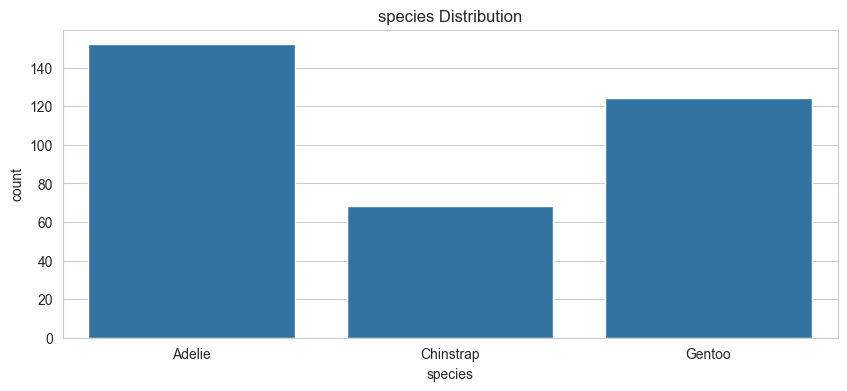

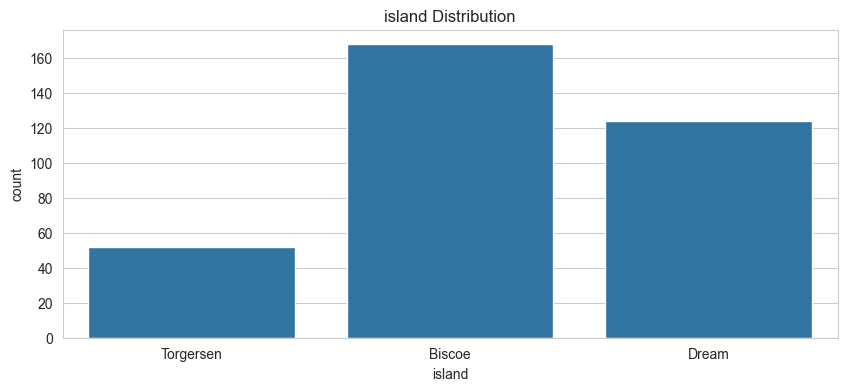

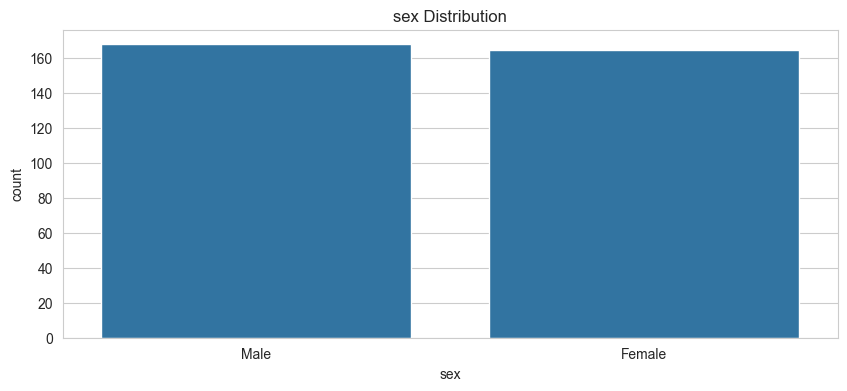

Dataset shape: (244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


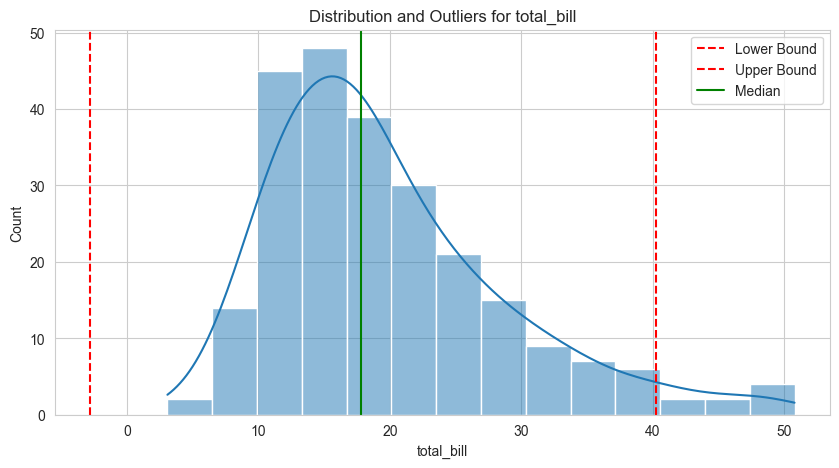

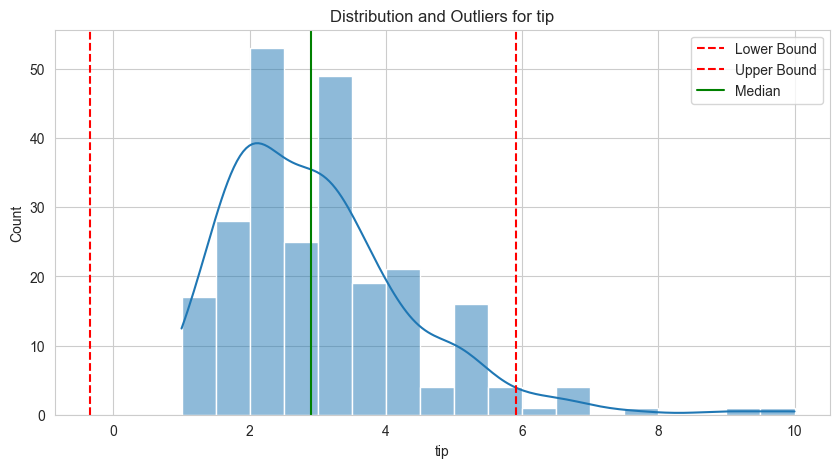

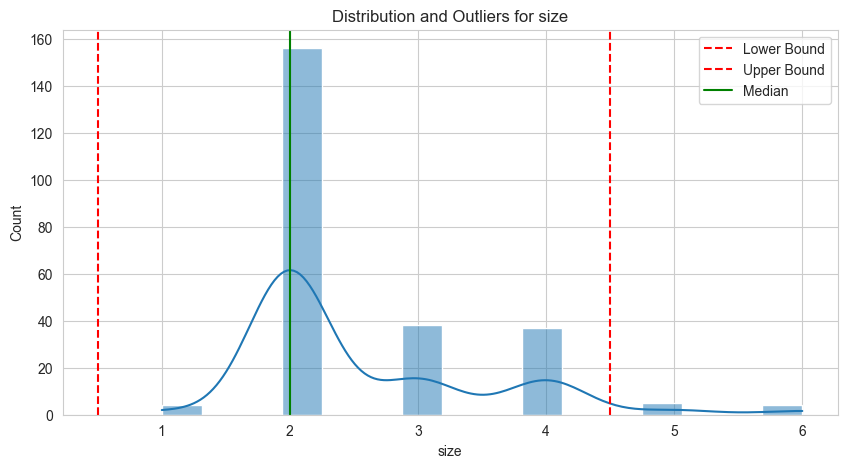

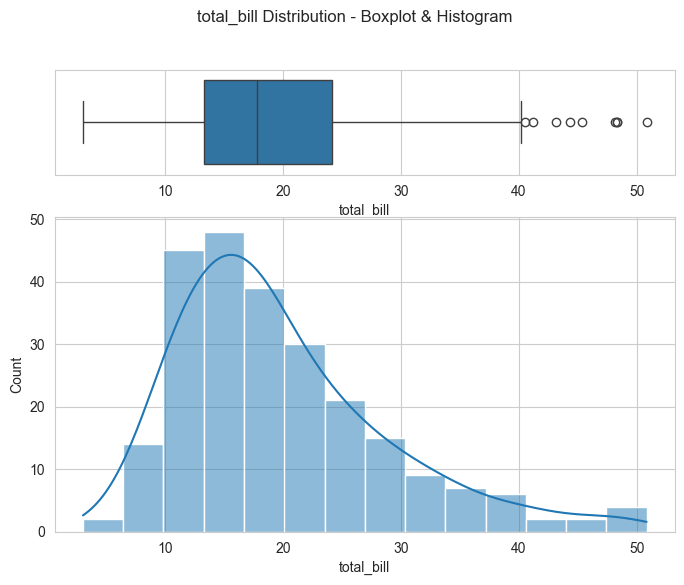

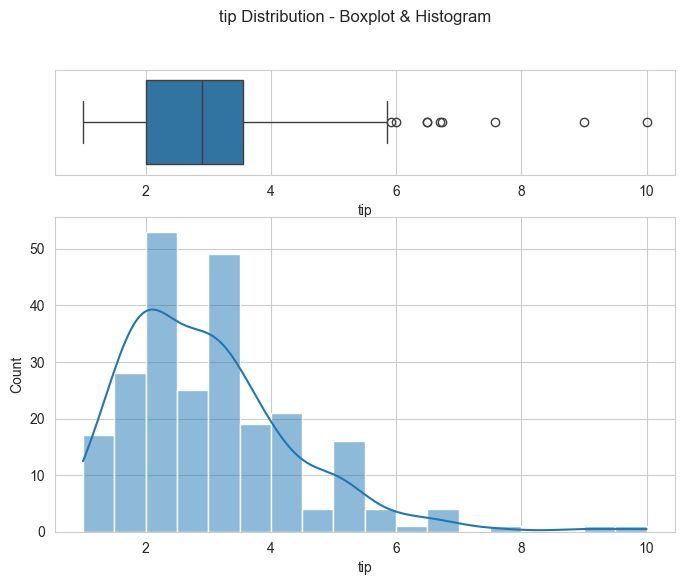

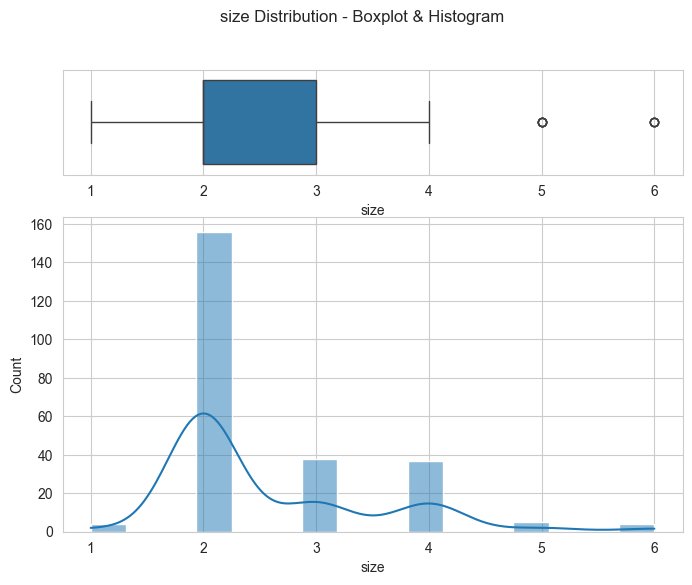

            count unique     top freq       mean       std   min      25%  \
total_bill  244.0    NaN     NaN  NaN  19.785943  8.902412  3.07  13.3475   
tip         244.0    NaN     NaN  NaN   2.998279  1.383638   1.0      2.0   
sex           244      2    Male  157        NaN       NaN   NaN      NaN   
smoker        244      2      No  151        NaN       NaN   NaN      NaN   
day           244      4     Sat   87        NaN       NaN   NaN      NaN   
time          244      2  Dinner  176        NaN       NaN   NaN      NaN   
size        244.0    NaN     NaN  NaN   2.569672    0.9511   1.0      2.0   

               50%      75%    max  Skewness  Kurtosis  
total_bill  17.795  24.1275  50.81  1.133213  1.218484  
tip            2.9   3.5625   10.0  1.465451  3.648376  
sex            NaN      NaN    NaN       NaN       NaN  
smoker         NaN      NaN    NaN       NaN       NaN  
day            NaN      NaN    NaN       NaN       NaN  
time           NaN      NaN    NaN       

'\n---\n\n# End of script\n'

In [1]:
"""
# Descriptive Statistics - Categorical Data, Outliers and Summary Statistics

## Topic Objectives
- Interpret statistics for categorical data.
- Identify outliers
- Summarise a data sample’s statistics

---

## Import Packages
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

"""
---

## 1. Categorical Data

Descriptive statistics for categorical (object) data focus on counting frequencies of categories.

We use the penguins dataset for examples:
"""
df = sns.load_dataset('penguins')
print(f"Dataset shape: {df.shape}")
print(df.head())

"""
Describing only categorical columns:
"""
cat_desc = df.select_dtypes(include='object').describe()
print(cat_desc)

"""
Value counts for each categorical variable:
"""
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

"""
Bar plots to visualize distributions:
"""
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.show()

"""
---

## 2. Outliers

Outliers are data points that deviate significantly from others.  
Rule of thumb (IQR method):  
- Outlier if below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

We use the tips dataset:
"""
df = sns.load_dataset('tips')
print(f"Dataset shape: {df.shape}")
print(df.head())

"""
Plot distributions with outlier bounds:
"""
for col in df.select_dtypes(include='number').columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR

    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution and Outliers for {col}')
    plt.legend()
    plt.show()

"""
---

## 3. Boxplots and Combined Visualization

Boxplots show median, quartiles, and outliers visually.

Combined boxplot and histogram for better perspective:
"""
for col in df.select_dtypes(include='number').columns:
    fig, axs = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
    sns.boxplot(x=df[col], ax=axs[0])
    sns.histplot(df[col], kde=True, ax=axs[1])
    fig.suptitle(f'{col} Distribution - Boxplot & Histogram')
    plt.show()

"""
---

## 4. Summary Statistics with Skewness and Kurtosis

- `.describe()` gives count, mean, std, quartiles, min, max.
- `.skew()` measures asymmetry.
- `.kurtosis()` measures tail heaviness.
- These apply to numerical data only.

Calculate and append skewness and kurtosis to summary:
"""
ser_skew = df.select_dtypes(include='number').skew()
ser_skew.name = 'Skewness'

ser_kurt = df.select_dtypes(include='number').kurtosis()
ser_kurt.name = 'Kurtosis'

summary_stats = df.describe(include='all').T
summary_stats = pd.concat([summary_stats, ser_skew, ser_kurt], axis=1)
print(summary_stats)

"""
---

# End of script
"""
